In [1]:
from threeML import *

from threeML.analysis_results import *

from threeML.io.progress_bar import progress_bar

import matplotlib.pyplot as plt

%matplotlib inline


WARNING ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.


WARNING RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.


WARNING UserWarning: Using default configuration from /home/giacomov/work_env/local/lib/python2.7/site-packages/threeML/data/threeML_config.yml. You might want to copy it to /home/giacomov/.threeML/threeML_config.yml to customize it and avoid this warning.



Plotter is MatPlotlib


In [2]:
# These are the same simulated dataset we use in the test of the XY plugin

x = np.linspace(0, 10, 50)

poiss_sig = [44, 43, 38, 25, 51, 37, 46, 47, 55, 36, 40, 32, 46, 37, 44, 42, 50, 48, 52, 47, 39, 55, 80, 93, 123, 135,
             96, 74, 43, 49, 43, 51, 27, 32, 35, 42, 43, 49, 38, 43, 59, 54, 50, 40, 50, 57, 55, 47, 38, 64]

In [3]:
# A simple test of the likelihood minimization

y = np.array(poiss_sig)

xy = XYLike("test", x, y, poisson_data=True)

fitfun = Line() + Gaussian()

fitfun.a_1.bounds = (-10, 10.0)
fitfun.b_1.bounds = (-100, 100.0)
fitfun.F_2 = 60.0
fitfun.F_2.bounds = (1e-3, 200.0)
fitfun.mu_2 = 5.0
fitfun.mu_2.bounds = (0.0, 100.0)
fitfun.sigma_2.bounds = (1e-3, 10.0)

model = Model(PointSource('fake',0.0, 0.0, fitfun))

data = DataList(xy)

jl = JointLikelihood(model, DataList(xy))
_ = jl.fit()

Using Poisson log-likelihood



WARNING NotANumberInLikelihood: These parameters returned a logLike = Nan: [  1.00000000e+00  -3.99890797e-03   6.00000000e+01   5.00000000e+00
   1.00000000e+00]


WARNING NotANumberInLikelihood: These parameters returned a logLike = Nan: [  1.00000000e+00  -3.99890797e-04   6.00000000e+01   5.00000000e+00
   1.00000000e+00]


WARNING NotANumberInLikelihood: These parameters returned a logLike = Nan: [  2.74689426e+00  -8.44189284e+01   1.99947409e+02   7.02357208e+01
   8.83576553e-02]


WARNING NotANumberInLikelihood: These parameters returned a logLike = Nan: [  5.99090526e+00  -7.25788207e+01   1.90297891e+02   2.28576945e+00
   5.99229188e-03]


WARNING NotANumberInLikelihood: These parameters returned a logLike = Nan: [  6.37129911 -21.56341203  66.87827585   9.68134519   6.37340368]


WARNING NotANumberInLikelihood: These parameters returned a logLike = Nan: [  5.79708816 -20.66950233  25.77003195  12.02397563   0.64058501]


WARNING NotANumberInLikelihood: These parameters re

Best fit values:



,Value,Unit
fake.spectrum.main.composite.a_1,(7.8 +/- 3.2) x 10^-1,1 / (cm2 keV2 s)
fake.spectrum.main.composite.b_1,(4.04 +/- 0.18) x 10,1 / (cm2 keV s)
fake.spectrum.main.composite.F_2,(7.2 +/- 0.6) x 10,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,4.990 +/- 0.030,keV
fake.spectrum.main.composite.sigma_2,(3.31 +/- 0.27) x 10^-1,keV



Correlation matrix:



1.00,-0.83,-0.01,-0.05,-0.01
-0.83,1.00,-0.17,0.05,-0.12
-0.01,-0.17,1.00,-0.04,0.41
-0.05,0.05,-0.04,1.00,-0.08
-0.01,-0.12,0.41,-0.08,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
test,175.307004
total,175.307004


In [4]:
# This functionality is still there, although it cannot be propagated
# (error propagation assume Gaussian errors, i.e., symmetric errors)
# In this case though errors are pretty symmetric, so we are likely in the case
# where the MLE is actually normally distributed

_ = jl.get_errors()

Name,Value,Unit
fake.spectrum.main.composite.a_1,(7.8 +/- 3.2) x 10^-1,1 / (cm2 keV2 s)
fake.spectrum.main.composite.b_1,(4.04 -0.18 +0.19) x 10,1 / (cm2 keV s)
fake.spectrum.main.composite.F_2,(7.2 +/- 0.6) x 10,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,4.990 +/- 0.030,keV
fake.spectrum.main.composite.sigma_2,(3.31 -0.26 +0.28) x 10^-1,keV


In [5]:
# This is the novelty. This access the new class of the results
ar = jl.results

In [6]:
ar.write_to("test_mle.fits", overwrite=True)

In [7]:
ar_reloaded = load_analysis_results("test_mle.fits")

In [8]:
ar_reloaded.get_statistic_frame()

,-log(likelihood)
test,175.307004
total,175.307004


In [9]:
# You can get a DataFrame with the results
ar_reloaded.get_data_frame()

,value,negative_error,positive_error,error,unit
fake.spectrum.main.composite.a_1,0.781044,-0.315472,0.321997,0.318735,1 / (cm2 keV2 s)
fake.spectrum.main.composite.b_1,40.361891,-1.819413,1.851921,1.835667,1 / (cm2 keV s)
fake.spectrum.main.composite.F_2,71.570184,-5.929421,5.716597,5.823009,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,4.989757,-0.029161,0.028821,0.028991,keV
fake.spectrum.main.composite.sigma_2,0.330629,-0.028079,0.026582,0.027330,keV


In [10]:
from threeML.analysis_results import AnalysisResultsSet

analysis_set = AnalysisResultsSet([ar, ar_reloaded])

analysis_set.set_bins("testing", [-1, 1], [3, 5], unit = 's')

analysis_set.write_to("analysis_set_test.fits", overwrite=True)

In [11]:
analysis_set = load_analysis_results("analysis_set_test.fits")

In [12]:
analysis_set[0].display()

Best fit values:



,Value,Unit
fake.spectrum.main.composite.a_1,(7.8 +/- 3.2) x 10^-1,1 / (cm2 keV2 s)
fake.spectrum.main.composite.b_1,(4.04 +/- 0.18) x 10,1 / (cm2 keV s)
fake.spectrum.main.composite.F_2,(7.2 +/- 0.6) x 10,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,4.990 +/- 0.030,keV
fake.spectrum.main.composite.sigma_2,(3.31 +/- 0.27) x 10^-1,keV



Correlation matrix:



1.00,-0.83,-0.01,-0.05,-0.01
-0.83,1.00,-0.17,0.05,-0.12
-0.01,-0.17,1.00,-0.04,0.41
-0.05,0.05,-0.04,1.00,-0.08
-0.01,-0.12,0.41,-0.08,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
test,175.307004
total,175.307004


In [13]:
# or display again the results. However, this time I choose to display
# hpd intervals
ar.display("hpd")

Best fit values:



,Value,Unit
fake.spectrum.main.composite.a_1,(7.8 +/- 3.2) x 10^-1,1 / (cm2 keV2 s)
fake.spectrum.main.composite.b_1,(4.04 +/- 0.18) x 10,1 / (cm2 keV s)
fake.spectrum.main.composite.F_2,(7.2 +/- 0.6) x 10,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,4.990 +/- 0.030,keV
fake.spectrum.main.composite.sigma_2,(3.31 +/- 0.27) x 10^-1,keV



Correlation matrix:



1.00,-0.83,-0.01,-0.05,-0.01
-0.83,1.00,-0.17,0.05,-0.12
-0.01,-0.17,1.00,-0.04,0.41
-0.05,0.05,-0.04,1.00,-0.08
-0.01,-0.12,0.41,-0.08,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
test,175.307004
total,175.307004


In [14]:
# You can use the results for propagating errors non-linearly for analytical functions
p1 = ar.get_variates("fake.spectrum.main.composite.a_1")
p2 = ar.get_variates("fake.spectrum.main.composite.b_1")

print("Propagating a+b, with a and b respectively:")
print(p1)
print(p2)

print("\nThis is the result (with errors):")
res = p1 + p2
print(res)

print res.equal_tail_confidence_interval()

# The propagation accounts for covariances, so for example this
# has error of zero (of course) since there is perfect covariance
print("\nThis is 50 * a/a:")
print(50 * p1/p1)

# You can use arbitrary (np) functions
print("\nThis is arcsinh(a + 5*b) / np.log10(b) (why not?)")
print(np.arcsinh(p1 + 5*p2) / np.log10(p2))

# Errors can become asymmetric. For example, the ratio of two gaussians is
# asymmetric notoriously:
print("\nRatio a/b:")
print(p2/p1)

# You can always use it with arbitrary functions like:
def my_function(x, a, b):
    
    return b*x**a

print("\nPropagating using a custom function:")
print(my_function(2.3, p1, p2))

Propagating a+b, with a and b respectively:
equal-tail: (7.7 -3.1 +3.2) x 10^-1, hpd: (7.7 -3.4 +2.9) x 10^-1
equal-tail: (4.04 -0.19 +0.18) x 10, hpd: (4.04 +/- 0.18) x 10

This is the result (with errors):
equal-tail: (4.12 -0.16 +0.15) x 10, hpd: (4.12 -0.15 +0.16) x 10
(39.58120551740343, 42.71993633743719)

This is 50 * a/a:
equal-tail: (5.0 +/- 0) x 10, hpd: (5.0 +/- 0) x 10

This is arcsinh(a + 5*b) / np.log10(b) (why not?)
equal-tail: 3.738 -0.017 +0.019, hpd: 3.738 +/- 0.018

Ratio a/b:
equal-tail: (5.2 -1.7 +4) x 10, hpd: (5.2 -2.4 +1.8) x 10

Propagating using a custom function:
equal-tail: (7.7 -1.5 +2.0) x 10, hpd: (7.7 -1.8 +1.7) x 10


equal-tail: (1.31 -0.10 +0.12) x 10^2, hpd: (1.31 -0.13 +0.09) x 10^2


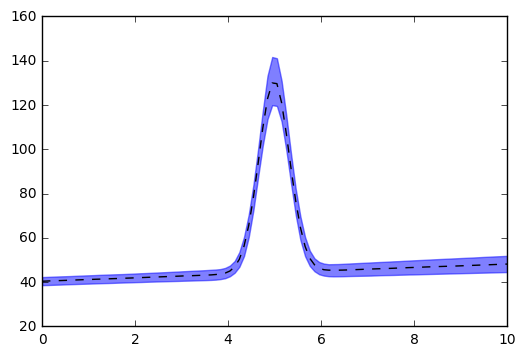

In [15]:
# This is an example of an error propagation to get the plot of the model with its errors
# (which are propagated without assuming linearity on parameters)

def go(fitfun, ar, model):
    
    # Gather the parameter variates
    
    arguments = {}

    for par in fitfun.parameters.values():

        if par.free:

            this_name = par.name
            
            this_variate = ar.get_variates(par.path)
            
            # Do not use more than 1000 values (would make computation too slow for nothing)
            
            if len(this_variate) > 1000:
                
                this_variate = np.random.choice(this_variate, size=1000)
            
            arguments[this_name] = this_variate
    
    # Prepare the error propagator function
    
    pp = ar.propagate(ar.optimized_model.fake.spectrum.main.shape.evaluate_at, **arguments)
    
    # You can just use it as:
    
    print(pp(5.0))
    
    #Make the plot
    
    energies = np.linspace(0, 10, 100)

    low_curve = np.zeros_like(energies)
    middle_curve = np.zeros_like(energies)
    hi_curve = np.zeros_like(energies)

    free_parameters = model.free_parameters
    
    with progress_bar(len(energies), title="Propagating errors") as p:
        
        with use_astromodels_memoization(False):
        
            for i, e in enumerate(energies):

                this_flux = pp(e)
                
                low_bound, hi_bound = this_flux.equal_tail_confidence_interval()
                
                low_curve[i], middle_curve[i], hi_curve[i] = (low_bound, this_flux.median, hi_bound)

                p.increase()

    plt.plot(energies, middle_curve, '--', color='black')
    plt.fill_between(energies, low_curve, hi_curve, alpha=0.5, color='blue')

go(fitfun, ar, model)

In [16]:
# Exactly the same can be done for a Bayesian analysis
# Let's run it first

for parameter in ar.optimized_model:
    
    model[parameter.path].value = parameter.value

model.fake.spectrum.main.composite.a_1.set_uninformative_prior(Uniform_prior)
model.fake.spectrum.main.composite.b_1.set_uninformative_prior(Uniform_prior)
model.fake.spectrum.main.composite.F_2.set_uninformative_prior(Log_uniform_prior)
model.fake.spectrum.main.composite.mu_2.set_uninformative_prior(Uniform_prior)
model.fake.spectrum.main.composite.sigma_2.set_uninformative_prior(Log_uniform_prior)

bs = BayesianAnalysis(model, data)

samples = bs.sample(20, 100, 1000)


Mean acceptance fraction: 0.5499

Maximum a posteriori probability (MAP) point:



,Value,Unit
fake.spectrum.main.composite.a_1,(8.1 -3.5 +2.8) x 10^-1,1 / (cm2 keV2 s)
fake.spectrum.main.composite.b_1,(4.03 -0.17 +0.20) x 10,1 / (cm2 keV s)
fake.spectrum.main.composite.F_2,(7.1 -0.5 +0.7) x 10,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,4.987 -0.029 +0.031,keV
fake.spectrum.main.composite.sigma_2,(3.31 -0.27 +0.30) x 10^-1,keV



Values of -log(posterior) at the minimum:



,-log(posterior)
test,-176.698279
total,-176.698279


In [17]:
ar2 = bs.results

In [18]:
ar2.write_to("test_bayes.fits", overwrite=True)

In [19]:
ar2_reloaded = load_analysis_results("test_bayes.fits")

In [20]:
np.allclose(ar2_reloaded.samples, ar2.samples)

True

In [21]:
ar2.get_data_frame("equal tail")

,value,negative_error,positive_error,error,unit
fake.spectrum.main.composite.a_1,0.810175,-0.352269,0.281939,0.317104,1 / (cm2 keV2 s)
fake.spectrum.main.composite.b_1,40.266060,-1.714355,1.968567,1.841461,1 / (cm2 keV s)
fake.spectrum.main.composite.F_2,70.624725,-4.970925,6.588271,5.779598,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,4.987446,-0.029302,0.030792,0.030047,keV
fake.spectrum.main.composite.sigma_2,0.330793,-0.026754,0.029881,0.028317,keV


In [22]:
p1 = ar2.get_variates("fake.spectrum.main.composite.a_1")
p2 = ar2.get_variates("fake.spectrum.main.composite.b_1")

print(p1)
print(p2)

res = p1 + p2

print(res)


equal-tail: (7.8 +/- 3.2) x 10^-1, hpd: (7.8 -3.1 +3.3) x 10^-1
equal-tail: (4.03 -0.18 +0.19) x 10, hpd: (4.03 -0.21 +0.15) x 10
equal-tail: (4.11 -0.15 +0.16) x 10, hpd: (4.11 -0.17 +0.14) x 10


equal-tail: (1.30 -0.10 +0.11) x 10^2, hpd: (1.30 -0.11 +0.08) x 10^2


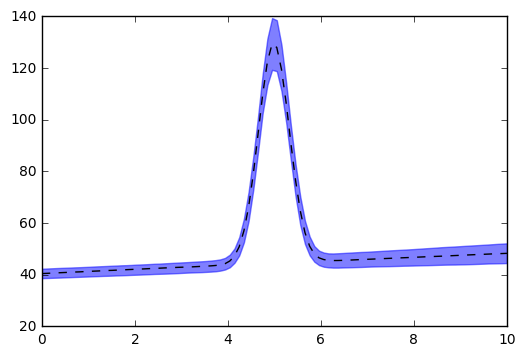

In [23]:
go(fitfun, ar2, model)